## AutoKeras Multi-modal Classification Model 
## Messidor with synthetic data for HbA1c 
## David K Ryan 17th December 

In [ ]:
!pip install autokeras
import numpy as np
import pandas as pd
import autokeras as ak
import tensorflow as tf


In [ ]:
#get access to google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls "/content/gdrive/My Drive/"

In [ ]:
#load in the meta-data 
train = pd.read_csv("/content/gdrive/My Drive/messidor_train.csv")
test = pd.read_csv("/content/gdrive/My Drive/messidor_test.csv")
train.drop(columns = 'Unnamed: 0', inplace=True)
test.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
#upload zip file to google drive and then unzip
!unzip "/content/gdrive/My Drive/Base11.zip" -d "/content/gdrive/My Drive/messidor_images/base11"
!unzip "/content/gdrive/My Drive/Base12.zip" -d "/content/gdrive/My Drive/messidor_images/base12"
!unzip "/content/gdrive/My Drive/Base13.zip" -d "/content/gdrive/My Drive/messidor_images/base13"
!unzip "/content/gdrive/My Drive/Base14.zip" -d "/content/gdrive/My Drive/messidor_images/base14"
!unzip "/content/gdrive/My Drive/Base21.zip" -d "/content/gdrive/My Drive/messidor_images/base21"
!unzip "/content/gdrive/My Drive/Base22.zip" -d "/content/gdrive/My Drive/messidor_images/base22"
!unzip "/content/gdrive/My Drive/Base23.zip" -d "/content/gdrive/My Drive/messidor_images/base23"
!unzip "/content/gdrive/My Drive/Base24.zip" -d "/content/gdrive/My Drive/messidor_images/base24"



In [ ]:
#count files in the folder that was unzipped 
import os
os.chdir("/content/gdrive/My Drive/messidor_images")

count = 0 

for i in os.listdir(): 
  count += 1

count

800

In [ ]:
!ls "/content/gdrive/My Drive/messidor_images"

In [ ]:
#this saves the images in a new file:"/content/gdrive/My Drive/base_11_unzipped/Base11"

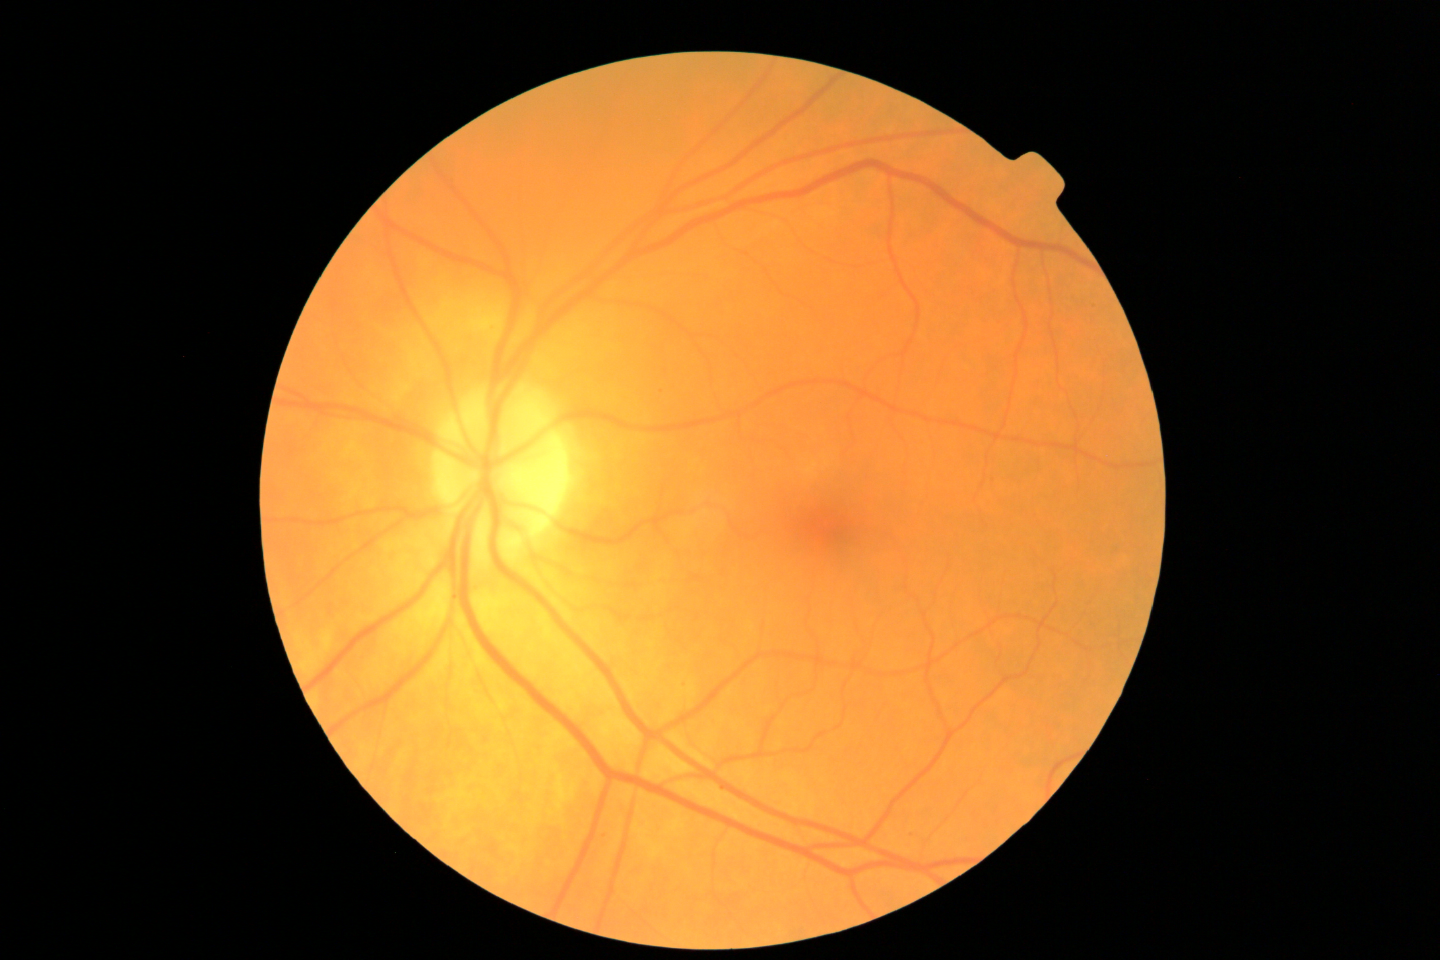

In [ ]:
#Display Image
from PIL import Image
img = Image.open('/content/gdrive/My Drive/messidor_images/20060410_39994_0200_PP.tif')
img

In [ ]:
## Rearrange folder according to outcome 

In [ ]:
from PIL import Image
from numpy import asarray

def convert_image_array(image): 
  img = Image.open(image).resize((180,180))
  data = asarray(img)
  return(data)

In [ ]:
train

,Image name,Retinopathy grade,Risk of macular edema,refer,hba1c
0,20060523_49269_0100_PP.tif,2,0,1,34.572195
1,20051214_41055_0100_PP.tif,0,0,0,26.763131
2,20051214_51733_0100_PP.tif,3,2,1,47.032758
3,20051214_57230_0100_PP.tif,3,1,1,48.092426
4,20051214_40361_0100_PP.tif,2,0,1,42.503601
...,...,...,...,...,...
695,20051213_62188_0100_PP.tif,2,0,1,49.206931
696,20051214_52611_0100_PP.tif,3,0,1,41.035402
697,20060411_51958_0200_PP.tif,3,1,1,44.296069
698,20051214_42323_0100_PP.tif,0,0,0,27.442435


In [ ]:
def organise_data(dir, dataframe): 
  """This takes the image from the directory and returns it in an array of appropriate size 
  based on the convert_image_array function. The data is then extracted from the main df for hba1c value and for result
  i.e. refer vs non-referrable diabetic retinopathy. A dictionary is also created as a record"""

  #structure for outputs 
  os.chdir(dir)
  image_list = []
  hba1c_list = []
  result_list = []
  dict_organised_data = {}

  for i in os.listdir():
    if i in list(dataframe['Image name']): 

      #extract_data 
      image_name = i
      image_list.append(convert_image_array(image_name))
      hba1c = dataframe[dataframe['Image name']== image_name]['hba1c']
      hba1c_list.append(hba1c)
      result = dataframe[dataframe['Image name']== image_name]['refer']
      result_list.append(result)

      #dictionary to verify result
      dict_organised_data[image_name] = [float(hba1c), float(result)]

    else: 
      pass

  #structure data appropriately 
  image_data = np.array(image_list)
  hba1c_data = np.array(hba1c_list)
  result_data = np.array(result_list)
  result_data = result_data.reshape(result_data.shape[0],)

  return(image_data, hba1c_data, result_data, dict_organised_data)

In [ ]:
train_image, train_hba1c, train_result, train_verification_dict = organise_data("/content/gdrive/My Drive/messidor_images", train)

In [ ]:
train_image.shape

(700, 180, 180, 3)

In [ ]:
test_image, test_hba1c, test_result, test_verification_dict = organise_data("/content/gdrive/My Drive/messidor_images", test)

In [ ]:
test_image.shape

(100, 180, 180, 3)

In [ ]:
#recreate the dataframe so that I can compare with original dataframe
train_verification_df = pd.DataFrame.from_dict(train_verification_dict, orient="index")
train_verification_df.reset_index(inplace=True)
train_verification_df.columns = ['image', 'hba1c', 'refer']

In [ ]:
train_verification_df.tail()

,image,hba1c,refer
695,20060530_55607_0100_PP.tif,49.891530,0.0
696,20060530_55724_0100_PP.tif,45.972139,1.0
697,20060530_55746_0100_PP.tif,40.217786,1.0
698,20060530_55816_0100_PP.tif,47.346466,1.0
699,20060530_55837_0100_PP.tif,49.606094,1.0


In [ ]:
#sanity check 
train[train['Image name']=='20060412_61169_0200_PP.tif']

,Image name,Retinopathy grade,Risk of macular edema,refer,hba1c
251,20060412_61169_0200_PP.tif,3,2,1,49.701987


In [ ]:
#recreate the dataframe so that I can compare with original dataframe
test_verification_df = pd.DataFrame.from_dict(test_verification_dict, orient="index")
test_verification_df.reset_index(inplace=True)
test_verification_df.columns = ['image', 'hba1c', 'refer']

In [ ]:
test_verification_df.tail()

,image,hba1c,refer
95,20060412_59124_0200_PP.tif,45.303976,1.0
96,20060412_60773_0200_PP.tif,42.550088,0.0
97,20060412_60978_0200_PP.tif,47.007038,1.0
98,20060412_61081_0200_PP.tif,47.658112,1.0
99,20060412_61151_0200_PP.tif,46.040535,1.0


In [ ]:
#sanity check 
test[test['Image name']=='20060412_59124_0200_PP.tif']

,Image name,Retinopathy grade,Risk of macular edema,refer,hba1c
6,20060412_59124_0200_PP.tif,2,0,1,45.303976


In [ ]:
#early stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [ ]:
#autokeras multi-modal input 

import autokeras as ak
# Initialize the multi with multiple inputs and outputs.
model = ak.AutoModel(
    inputs=[ak.ImageInput(), ak.StructuredDataInput()],
    outputs=[
        ak.ClassificationHead(loss='binary_crossentropy', metrics=['accuracy'])
    ],
    overwrite=True,
    max_trials=2)

# Fit the model with prepared data.
model.fit(
    [train_image, train_hba1c],
    [train_result],
    validation_split=0.15,
    callbacks=[callback])

Trial 1 Complete [01h 44m 08s]
val_loss: 0.5072305798530579

Best val_loss So Far: 0.5072305798530579
Total elapsed time: 01h 44m 08s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|False             |False             
image_block_1/a...|False             |False             
image_block_1/b...|resnet            |resnet            
image_block_1/r...|False             |False             
image_block_1/r...|resnet50          |resnet50          
image_block_1/r...|False             |False             
structured_data...|False             |False             
structured_data...|False             |False             
structured_data...|2                 |1                 
structured_data...|32                |32                
structured_data...|0                 |0                 
structured_data...|32                |32                
classification_...|0                 |0                 
optimizer         |adam              |ada

In [ ]:
preds = model.predict([test_image, test_hba1c])


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
accuracy =  accuracy_score(test['refer'], preds)
recall = recall_score(test['refer'], preds)
precision = precision_score(test['refer'], preds)

In [ ]:
print("accuracy:", accuracy, "\nrecall:", recall, '\nprecision:',precision)

accuracy: 0.49 
recall: 0.9777777777777777 
precision: 0.46808510638297873


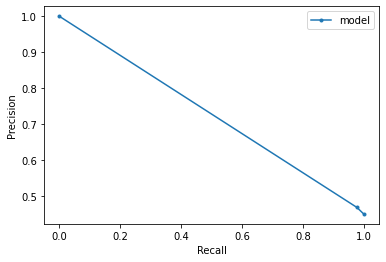

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from sklearn.metrics import precision_recall_curve
#precision_recall_curve
precision, recall, _ = precision_recall_curve(test['refer'], preds)
pyplot.plot(recall,precision, marker='.', label='model')
#axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
#show the legend
pyplot.legend()
#show the plot
pyplot.show()

In [ ]:
model = odel.export_model()

In [ ]:
try:
    model.save("model_autokeras", save_format="tf")
except:
    model.save("model_autokeras.h5")

In [ ]:
model.evaluate([image_data, hba1c_data], [result_data], batch_size=32)

4/4 [==============================] - 12s 2s/step - loss: 0.8208 - accuracy: 0.7800


[0.8208231925964355, 0.7799999713897705]